torch.Size([1, 1, 128, 88])


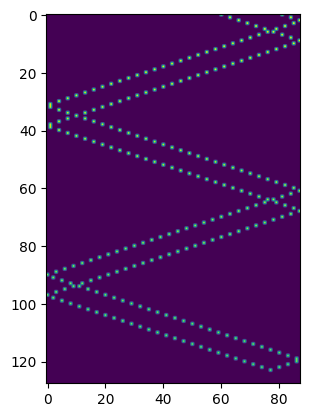

In [37]:
import  torch
import  numpy as np
import matplotlib.pyplot as plt

file_path = r'N:\Yr 3 Project Datasets\RDT 50KM Fix\Data\2.npy .npy'
data = np.load(file_path)
data = torch.from_numpy(data)
data = data.unsqueeze(0).unsqueeze(0)
print(data.shape)


plt.imshow(data[0, 0])
plt.show()


In [38]:
def expand_data_to_new_dimPREFERED(input_tensor, timesteps):
    """
    # Number of dp is related to timestep size. 1,000 = 3dp, 10,000 = 4dp, 100,000 = 5dp, 1,000,000 = 6dp etc
    
    """

    # Determine the number of classes (third dimension size)
    num_classes = timesteps 

    # Convert the input tensor to indices
    indices = input_tensor.long()

    # Create one-hot encoded tensor
    one_hot_encoded = torch.nn.functional.one_hot(indices, num_classes=num_classes).float()

    return one_hot_encoded

In [46]:
output_2 = expand_data_to_new_dimPREFERED(data, 1000)
print(output_2.shape)

output_2 = output_2.squeeze(0).squeeze(0)
print(output_2.shape)




torch.Size([1, 1, 128, 88, 1000])
torch.Size([128, 88, 1000])


In [61]:
def plot_3d(pixel_block_3d, detector_pixel_dimensions, time_resoloution):

    hits_3d = np.nonzero(pixel_block_3d)
    print(hits_3d)
    x3d = hits_3d[2]
    y3d = hits_3d[1]
    z3d = hits_3d[3]

    fig = plt.figure()               #Plots spherical data
    ax = plt.axes(projection='3d')
    ax.scatter(x3d, y3d, z3d)#, s = signal_hit_size, c = "b") #Plots spherical data in blue
    #ax.scatter(x_sph_noise_data,y_sph_noise_data,z_sph_noise_data, s = noise_hit_size, c = noise_colour) #Plots spherical noise in blue or red depending on the user selection of seperate_noise_colour
    #ax.set_xlim(0, detector_pixel_dimensions[0])
    #ax.set_ylim(0, detector_pixel_dimensions[1])
    #ax.set_zlim(0, time_resoloution)
    plt.show()




tensor([[  0,   0,   0],
        [  0,   1,   0],
        [  0,   2,   0],
        ...,
        [127,  85,   0],
        [127,  86,   0],
        [127,  87,   0]])


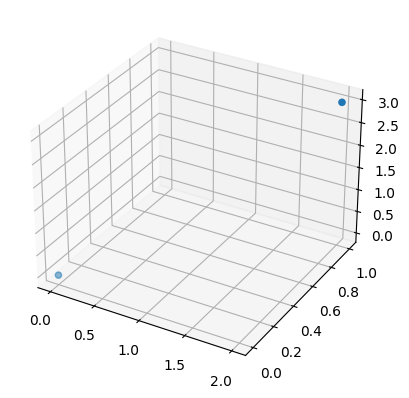

In [62]:
detector_pixel_dimensions = [128, 88]
time_resoloution = 1000
plot_3d(output_2, detector_pixel_dimensions, time_resoloution)



In [ ]:

# 3D Reconstruction function
def reconstruct_3D(*args):
    """
    3D reconstruction function that takes any number of 2D arrays created through our 3D to 2D with embedded ToF method and reconstructs them into a 3D arrays. 
    
    Args:
        *args (np array): Any number of 2D arrays to be reconstructed.

    Returns:
        results (np array): The reconstructed 3D arrays. Same number of arrays as input.
    """
    
    coords = []
    for data in args:
        data_output = []
        for cdx, row in enumerate(data):
            for idx, num in enumerate(row):
                if num > 0:  
                    data_output.append([cdx, idx, num])
        coords.append(np.array(data_output))

    pixel_block_3d = np.zeros((1, detector_pixel_dimensions[1],detector_pixel_dimensions[0],time_resoloution),dtype = np.single)
    for idr, r in enumerate(coords[0][ :,0]):
        c = coords[0][idr][1]
        depth = coords[0][idr][2]
        pixel_block_3d[0][int(c)][int(r)][int(depth)] = 1     # -c broke the 3d


    return coords, pixel_block_3d

